# Homework 2

### Part 1: Using the Saha and Boltzmann Equations

Important information:  
*The first row in each file is a list of $\Theta$ values, the second row is a corresponding list of $\log_{10}P_e[erg\ cm^{-3}]$ which are the required inputs for the Saha equation.*

The Saha equation defined in the homework is given by: 
$$
\log_{10}\frac{N_{II}}{N_{I}} = \log_{10}\frac{Z_{II}}{Z_{I}} + \log_{10}(2) + \frac{5}{2}\log_{10}(T)- \chi_{ion}\Theta - \log_{10}(P_e)-0.4772
$$

with $\Theta = \frac{5040}{T} $ and $\chi_{ion}= 13.595 eV$

#### 1 
*Determine the partition function for ionized and neutral H by reviewing carrol and ostlie Ch 8.1 carefully. State what your partition function ratio is and why*  

The partition function for an atom is given by
$$
Z = \sum_{j = 1}^{\infty}g_{j}e^{(E_j - E_1)/kT}
$$
with $g_j$ the degeneracy of the jth energy level, $E_j$ the energy of the jth energy level. A hydrogen ion is just a proton so $Z_{II} = 1$. The energy of the first excited state of hydrogen is $E_2 - E_1 = 10.2\ eV$ above the ground state energy. Because $10.2 eV >> kT$ for the temperature regime of stars, the Boltzmann factor $e^{(E_2 - E_1)/kT} << 1$ There for nearly all $H_I$ atoms are in the ground state which has degeneracy = 2 so $Z_1 \approx g_1 = 2$. The ratio of partition functions is 
$$
\frac{Z_{II}}{Z_{I}} = 1 / 2
$$ 

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Read in the data
sunAtmos = pd.read_table('sun-atmosphere-kamp.txt',
                         header = 0,
                         names = np.arange(0, 50, 1),
                         delim_whitespace = True).transpose()

vegaAtmos = pd.read_csv('vega-atmosphere-kamp.txt',
                        header = 0,
                        names = np.arange(0, 50, 1),
                        delim_whitespace = True).transpose()

sunAtmos.columns = ['theta', 'log10_pe']
vegaAtmos.columns = ['theta', 'log10_pe']

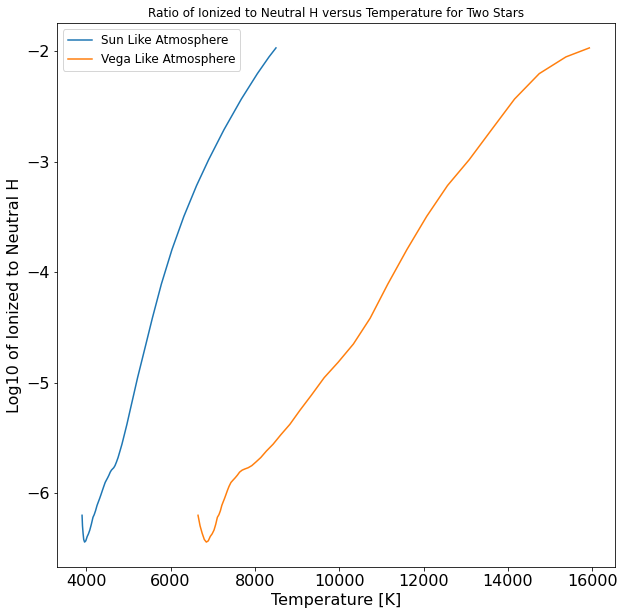

In [81]:
# Define the saha equation: 

chi_ion = 13.595 # Ionization energy of hydrogen in ground state
def saha(theta, log10_p):
    T = 5040 / theta
    return T, (np.log10(1/2) + np.log10(2) + (5/2)*np.log10(T) 
            - chi_ion*theta - log10_p - 0.4772)

# Solve the Saha equation for each layer: 
tSun, HRatioSun = saha(sunAtmos['theta'], sunAtmos['log10_pe'])
tVega, HRatioVega = saha(vegaAtmos['theta'], vegaAtmos['log10_pe'])

fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.tick_params(labelsize = 16)

ax.plot(tSun, HRatioSun, label = 'Sun Like Atmosphere')
ax.plot(tVega, HRatioSun, label = 'Vega Like Atmosphere')
ax.set_ylabel('Log10 of Ionized to Neutral H', fontsize = 16)
ax.set_xlabel('Temperature [K]', fontsize = 16)
ax.set_title('Ratio of Ionized to Neutral H '+  
             'versus Temperature for Two Stars')

ax.legend(fontsize = 12)

The above plot shows the ratio of ionized to neutral hydrogen for two stars. The temperature is calculated from the inverse temperature given in the data for the model stars. The data were generated assuming different depths within the star, therefore the temperature serves as a proxy for star depth and the above graph can be interpreted as showing the ratio of ionized to nuetral hydrogen at different depths within the stars.

### Part 2: H$\alpha$ Absorption versus temperature

#### 1

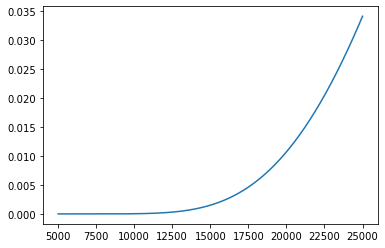

In [93]:
k = 1.38e-23
def boltz(g, E, T): 
    """
    E should be given in units of joules
    """
    return g*np.exp(-E/(k*T))

t = np.linspace(5000, 25000, 1000)
ratio = boltz(8, -3.4*1.6e-19, t)/(boltz(8, -3.4*1.6e-19, t)
                                   + boltz(2, -13.6*1.6e-19, t))
plt.plot(t, ratio)